<a href="https://colab.research.google.com/github/Ymy9he/EDA/blob/main/Copy_of_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. The paper is about data tidying which is a data cleaning component that uses a small set of tools to clean a wide range of un-tidy data.
2. The tidy data standard is intended to
 simplify the initial data cleansing process by connecting similar tools so that a person does not need to restart everytime.
 3. Part 1: In essence, tidy datasets have a standardized and consistent structure, while messy datasets can vary widely in terms of their messiness.
  Part 2: Identifying variables and observations are typically straightfoward, but the conceptualization of these items into specific concepts can become challenging
4. Values are numeric or strings that are organized as either a variable which contains all values that measure the same underlying attribute acoss units. Or an observation which contains all values measured on the sam unit across attributes.
5. Tidy Data is a standard way of mapping the meaning of a dataset to its structure depending on how rows, columns, and tables are matched up with observations, variables, and types.
6. 5 most common problems: (1) column headers are values, not variable names (2) Multiple variables are stored in one column (3) variables are stored in both rows and columns (4) multple types of observational units are stored in the same table (5) a single observational unit stored in multiple tables 3
- The variables in table 4 are messy because the variables form both the rows and coumns, and column jeaders are values and not variable names.
- Melting a dataset is is turnig columns into rows to tidy the structure.
7. In table 11 a single observational unit is stored in multiple tables. In table 12 is molten data because it puts all the shared unit into one column named "value". Part B is tidy because it seperates the element column into two new columns for the max and min making the data more easily readable and understanable.
8. That metaphor is refering to the need to further expand tidy data methods and tools before they become so used that using other alternatives no longer becomes a thought. Thus, Wickham hopes that others will build on this strategry to development more effencient and better tools.


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
! git clone https://github.com/Ymy9he/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('./assignment2/data/airbnb_hw.csv')

#1

#df.head()

# Remove commas, dollar signs, and other non-numeric characters
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True)

# Convert to float
df['Price'] = df['Price'].astype(float)

# Check unique values again
unique_prices = df['Price'].unique()
print(unique_prices)

missing_values = df['Price'].isnull().sum()
print("Number of missing values in Price:", missing_values)


#no missing values






[  145.    37.    28.   199.   549.   149.   250.    90.   270.   290.
   170.    59.    49.    68.   285.    75.   100.   150.   700.   125.
   175.    40.    89.    95.    99.   499.   120.    79.   110.   180.
   143.   230.   350.   135.    85.    60.    70.    55.    44.   200.
   165.   115.    74.    84.   129.    50.   185.    80.   190.   140.
    45.    65.   225.   600.   109.  1990.    73.   240.    72.   105.
   155.   160.    42.   132.   117.   295.   280.   159.   107.    69.
   239.   220.   399.   130.   375.   585.   275.   139.   260.    35.
   133.   300.   289.   179.    98.   195.    29.    27.    39.   249.
   192.   142.   169.  1000.   131.   138.   113.   122.   329.   101.
   475.   238.   272.   308.   126.   235.   315.   248.   128.    56.
   207.   450.   215.   210.   385.   445.   136.   247.   118.    77.
    76.    92.   198.   205.   299.   222.   245.   104.   153.   349.
   114.   320.   292.   226.   420.   500.   325.   307.    78.   265.
   108

In [17]:
df= pd.read_csv('/content/assignment2/data/sharks.csv', low_memory= False)
df.head()

#2
nan_count = df['Type'].isna().sum()
print("Number of NaN values in 'Type' column:", nan_count) #number of NaN values

print(df['Type'].unique(), '\n') # A Categorical Example

df['Type'] = df['Type'].replace({ #grouping shared categories
    'Boat':'Boating',
    'Unconfirmed': 'Unverified',
    'Boatomg':'Boating',
    'Questionable': 'Unverified',
    'Under investigation': 'Unverified',
    'Sea Disaster':'Boating',
    'Invalid':'Unverified',
    'Watercraft':'Boating',
})

df['Type_Missing']=df['Type'].replace(np.nan, "Type_Missing") # represents the 5 missing numbers
print(df['Type'].value_counts(), '\n')
print(df['Type_Missing'].value_counts(), '\n')


Number of NaN values in 'Type' column: 5
['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg'] 

Unprovoked    4716
Provoked       593
Boating        583
Unverified     565
Name: Type, dtype: int64 

Unprovoked      4716
Provoked         593
Boating          583
Unverified       565
Type_Missing       5
Name: Type_Missing, dtype: int64 



In [35]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('./VirginiaPretrialData2017.csv')
df.head()

#3

# Check unique values
unique_pretrail = df['WhetherDefendantWasReleasedPretrial'].unique()
print(unique_pretrail)

#check missing values
missing_values = df['WhetherDefendantWasReleasedPretrial'].isnull().sum()
print("Number of missing values in WhetherDefendantWasReleasedPretrial:", missing_values) # no missing numbers

df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace( [9], np.nan) # I saw 9 in the data which is an error according
#to the codebook
print(df['WhetherDefendantWasReleasedPretrial'].describe()) # described the missing values



#4

# Replace empty strings with NaN
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].replace(' ', np.nan)

# Check the count of missing values
missing_count = df['ImposedSentenceAllChargeInContactEvent'].isnull().sum()
print(f"Number of missing values: {missing_count}") #9053 missing values

# Convert the column to float
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].astype(float)

# Check the summary statistics of the column
print(df['ImposedSentenceAllChargeInContactEvent'].describe())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-35-80dcdc3cd4f0>:4: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,

[9 0 1]
Number of missing values in WhetherDefendantWasReleasedPretrial: 0
count    22955.000000
mean         0.834415
std          0.371716
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: WhetherDefendantWasReleasedPretrial, dtype: float64
Number of missing values: 9053
count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
! git clone https://github.com/Ymy9he/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
from pandas.core.frame import Level
import pandas as pd
import numpy as np

df = pd.read_csv('/content/assignment2/data/college_completion.csv')

df.shape #Dimensions of the data: (3798, 63)
num_observations = len(df) #Number of observations: 3798
df.dtypes, '\n' # The types are integers, objects, and float
df.head()
#print(df.iloc[0:20,5:7],'\n') # examining first 20 rows of columns level and control

cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab)

# The most prominent 2 year-institioon is public, where as private not-for profit
# is popular for 4 year insititions

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


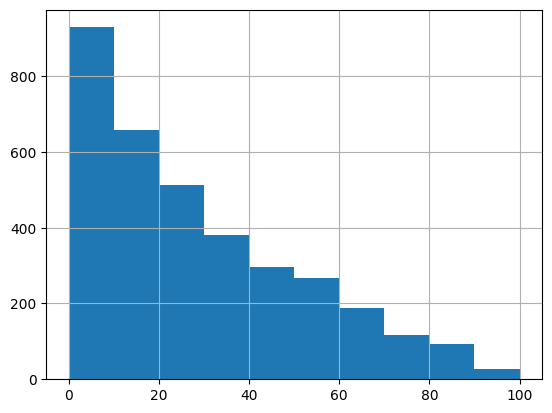

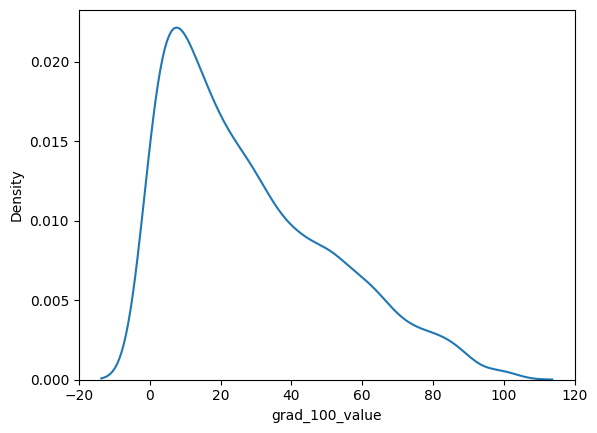

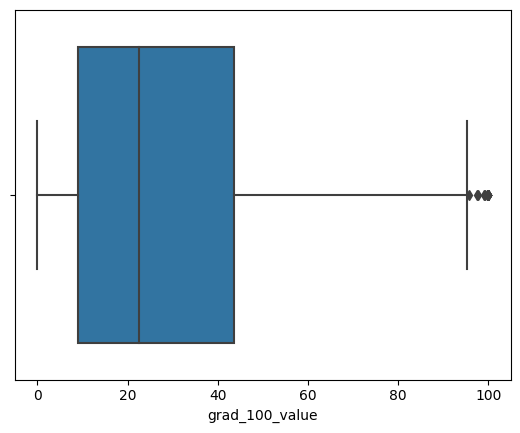

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt



df['grad_100_value'].hist(), '\n'
plt.show()

sns.kdeplot(data= df, x= 'grad_100_value')
plt.show()

sns.boxplot(data=df, x='grad_100_value')
plt.show()

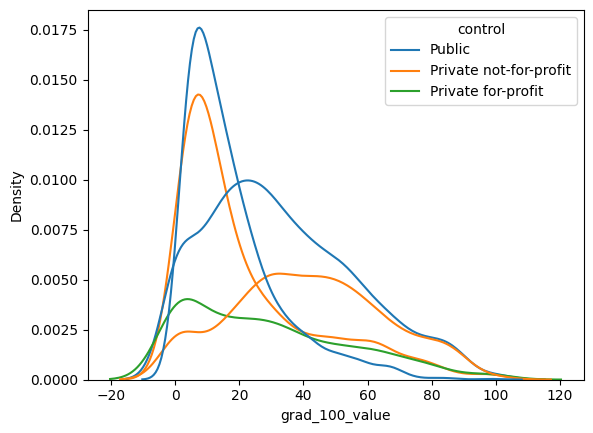

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

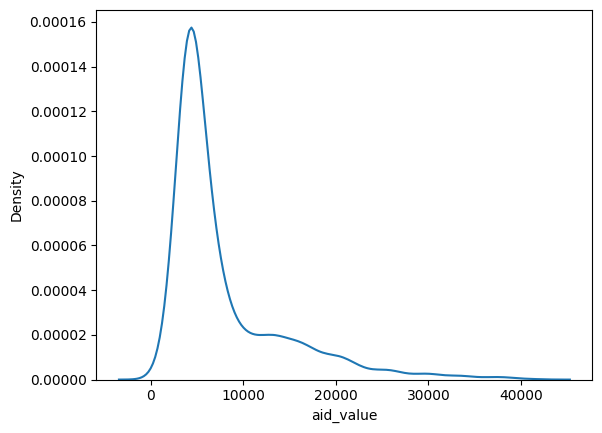

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x='grad_100_value', hue='level')
sns.kdeplot(data=df, x= 'grad_100_value', hue='control')

plt.show()

# Calculate statistical descriptions of 'grad_100_value' by 'level' and 'control'
stats_by_level_control = df.groupby(["level", "control"])["grad_100_value"].describe()
print(stats_by_level_control)
# Identify institutions with the best graduation rates
# Best graduation rate by level is 2-year
# best grauation rate by control is : privae- not for profit, however if you only look at the graph
# public insitions appear to have a better graduation rate

df['levelXcontrol'] = df['level'] + ', ' + df['control']
#Private not-for-profit instition appears to have a better graph

y= sns.kdeplot(data= df, x = 'aid_value') #small curve that shows a Bi-modal of
print(y)
# two distinct data points (controls) with their own mean and variance
group_data = df.groupby(['level', 'control'])['aid_value'].describe()
print(group_data)




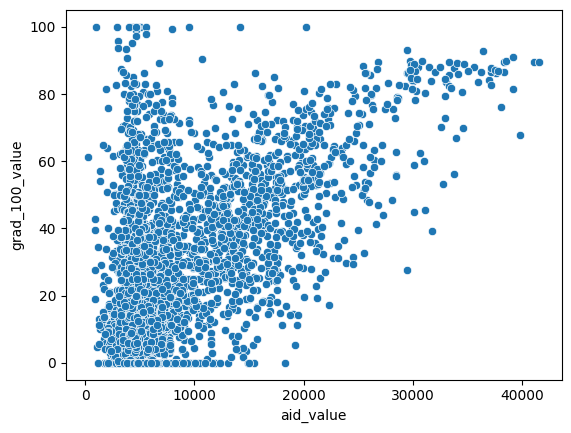

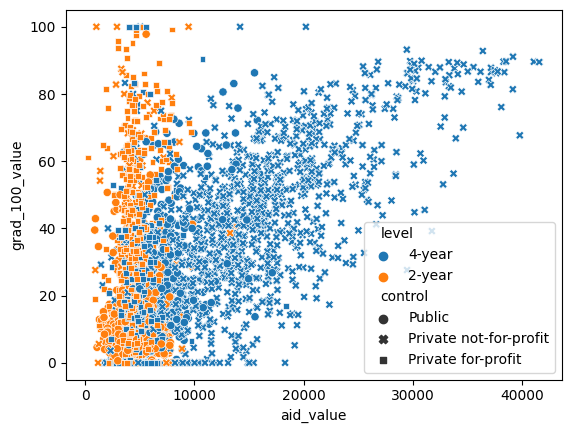

In [27]:
scat = sns.scatterplot(data = df, x ='aid_value', y= 'grad_100_value') # a bunch
#of points scatter all over the graph(hard to read())
plt.show()

sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level', style='control')
plt.show() #this makes the information more easir to comprehend
# because the levels are color coded and the controls are discribed by a specific shape

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.